In [1]:
import sqlalchemy

In [2]:
engine = sqlalchemy.create_engine('sqlite:///../../data/COMPAS/compas.db')

In [3]:
inspector = sqlalchemy.inspect(engine)

In [4]:
inspector.get_table_names()

['casearrest',
 'charge',
 'compas',
 'jailhistory',
 'people',
 'prisonhistory',
 'summary']

In [5]:
cursor = engine.execute('SELECT * FROM compas LIMIT 10')

In [6]:
cursor.fetchall()

[(1, 'miguel', 'hernandez', 56418, 58393, 64352, 'PRETRIAL', 'Risk and Prescreen', 'Intake', 'Pretrial', 'Jail Inmate', 'Single', '2013-08-14 00:00:00.000000', 1, 'Low', 'Low', 7, 'Risk of Violence', -4.31, 1, 1),
 (2, 'miguel', 'hernandez', 56418, 58393, 64352, 'PRETRIAL', 'Risk and Prescreen', 'Intake', 'Pretrial', 'Jail Inmate', 'Single', '2013-08-14 00:00:00.000000', 1, 'Low', 'Low', 8, 'Risk of Recidivism', -2.78, 1, 1),
 (3, 'miguel', 'hernandez', 56418, 58393, 64352, 'PRETRIAL', 'Risk and Prescreen', 'Intake', 'Pretrial', 'Jail Inmate', 'Single', '2013-08-14 00:00:00.000000', 1, 'Low', 'Low', 18, 'Risk of Failure to Appear', 13, 1, 1),
 (4, 'michael', 'ryan', 68603, 72042, 79669, 'PRETRIAL', 'Risk and Prescreen', 'Intake', 'Pretrial', 'Jail Inmate', 'Single', '2014-12-31 00:00:00.000000', 1, 'Low', 'Low', 7, 'Risk of Violence', -2.75, 2, 2),
 (5, 'michael', 'ryan', 68603, 72042, 79669, 'PRETRIAL', 'Risk and Prescreen', 'Intake', 'Pretrial', 'Jail Inmate', 'Single', '2014-12-31 0

In [7]:
import pandas

In [8]:
people = pandas.read_sql('people', engine)

In [9]:
people.head()

,id,name,first,last,sex,race,dob,age,age_cat,juv_fel_count,...,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,is_violent_recid,num_vr_cases,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc
0,1,miguel hernandez,miguel,hernandez,Male,Other,1947-04-18,69,Greater than 45,0,...,NaT,None,NaT,NaT,0,None,None,None,NaT,None
1,2,michael ryan,michael,ryan,Male,Caucasian,1985-02-06,31,25 - 45,0,...,NaT,None,NaT,NaT,0,None,None,None,NaT,None
2,3,kevon dixon,kevon,dixon,Male,African-American,1982-01-22,34,25 - 45,0,...,2013-07-05,Felony Battery (Dom Strang),NaT,NaT,1,None,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang)
3,4,ed philo,ed,philo,Male,African-American,1991-05-14,24,Less than 25,0,...,2013-06-16,Driving Under The Influence,2013-06-16 09:05:47,2013-06-16 07:18:55,0,None,None,None,NaT,None
4,5,marcu brown,marcu,brown,Male,African-American,1993-01-21,23,Less than 25,0,...,NaT,None,NaT,NaT,0,None,None,None,NaT,None


In [10]:
people.columns

Index(['id', 'name', 'first', 'last', 'sex', 'race', 'dob', 'age', 'age_cat',
       'juv_fel_count', 'juv_misd_count', 'juv_other_count',
       'compas_screening_date', 'decile_score', 'score_text', 'violent_recid',
       'priors_count', 'days_b_screening_arrest', 'c_jail_in', 'c_jail_out',
       'c_case_number', 'c_days_from_compas', 'c_arrest_date',
       'c_offense_date', 'c_charge_degree', 'c_charge_desc', 'is_recid',
       'num_r_cases', 'r_case_number', 'r_charge_degree', 'r_days_from_arrest',
       'r_offense_date', 'r_charge_desc', 'r_jail_in', 'r_jail_out',
       'is_violent_recid', 'num_vr_cases', 'vr_case_number',
       'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc'],
      dtype='object')

In [11]:
compas = pandas.read_sql('compas', engine)

In [12]:
compas.head()

,id,first,last,compas_person_id,compas_case_id,compas_assessment_id,agency_text,scale_set,assessment_reason,legal_status,...,marital_status,screening_date,rec_supervision_level,rec_supervision_level_text,score_text,scale_id,type_of_assessment,raw_score,decile_score,person_id
0,1,miguel,hernandez,56418,58393,64352,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2013-08-14,1,Low,Low,7,Risk of Violence,-4,1,1
1,2,miguel,hernandez,56418,58393,64352,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2013-08-14,1,Low,Low,8,Risk of Recidivism,-2,1,1
2,3,miguel,hernandez,56418,58393,64352,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2013-08-14,1,Low,Low,18,Risk of Failure to Appear,13,1,1
3,4,michael,ryan,68603,72042,79669,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2014-12-31,1,Low,Low,7,Risk of Violence,-2,2,2
4,5,michael,ryan,68603,72042,79669,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2014-12-31,1,Low,Medium,8,Risk of Recidivism,0,5,2


In [13]:
compas.columns

Index(['id', 'first', 'last', 'compas_person_id', 'compas_case_id',
       'compas_assessment_id', 'agency_text', 'scale_set', 'assessment_reason',
       'legal_status', 'custody_status', 'marital_status', 'screening_date',
       'rec_supervision_level', 'rec_supervision_level_text', 'score_text',
       'scale_id', 'type_of_assessment', 'raw_score', 'decile_score',
       'person_id'],
      dtype='object')

In [27]:
# In this setting we are interested mainly in whether the score $a$ we have given indidivuals is fair with respect to their sensitive attribute $z$ and their underlying quality $y$, i.e. whether or not recidivism occurred.
df = pandas.read_sql('''SELECT race,
                        is_violent_recid,
                        agency_text,
                        compas.decile_score FROM people JOIN compas ON person_id = people.id''', engine)

In [28]:
df.head()

,race,is_violent_recid,agency_text,decile_score
0,Other,0,PRETRIAL,1
1,Other,0,PRETRIAL,1
2,Other,0,PRETRIAL,1
3,Caucasian,0,PRETRIAL,2
4,Caucasian,0,PRETRIAL,5


In [29]:
counts = df.groupby(['race', 'is_violent_recid']).decile_score.value_counts()

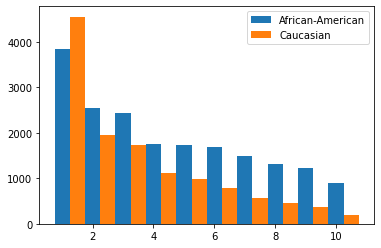

In [113]:
import matplotlib.pyplot as plt
import numpy as np
counts = df.groupby(['race']).decile_score.value_counts()
X = 1 + np.arange(10)
plt.bar(X, counts['African-American'][0:10], width=0.5)
plt.bar(X+0.5, counts['Caucasian'][0:10], width=0.5)
plt.legend(["African-American", "Caucasian"])

In [122]:
counts = df.groupby(['race']).decile_score.value_counts()
AA = df[df['race']=="African-American"][["is_violent_recid", "decile_score"]]
CC = df[df['race']=="Caucasian"][["is_violent_recid", "decile_score"]]


Text(0, 0.5, 'Recidivism')

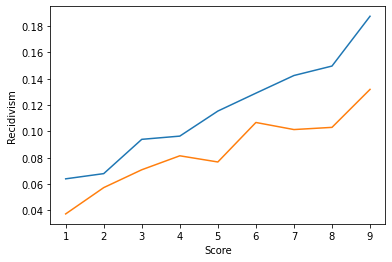

In [133]:
%matplotlib inline
AA_recidivism = np.zeros(10)
CC_recidivism = np.zeros(10)

for score in range(10):
    AA_recidivism[score] = np.mean(AA[AA["decile_score"]==score]["is_violent_recid"])
    CC_recidivism[score] = np.mean(CC[CC["decile_score"]==score]["is_violent_recid"])
    
plt.plot(AA_recidivism)
plt.plot(CC_recidivism)
plt.xlabel("Score")
plt.ylabel("Recidivism")

Text(0.5, 1.0, 'Non-recidivists')

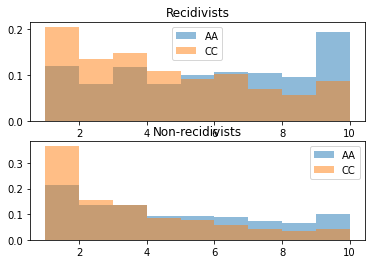

In [155]:
plt.subplot(2,1,1)
plt.hist(AA[AA.is_violent_recid==1].decile_score,alpha=0.5,density=True, bins=X)
plt.hist(CC[CC.is_violent_recid==1].decile_score,alpha=0.5,density=True, bins=X)
plt.legend(["AA", "CC"])
plt.title("Recidivists")

plt.subplot(2,1,2)
plt.hist(AA[AA.is_violent_recid==0].decile_score,alpha=0.5,density=True, bins=X)
plt.hist(CC[CC.is_violent_recid==0].decile_score,alpha=0.5,density=True, bins=X)
plt.legend(["AA", "CC"])
plt.title("Non-recidivists")



<AxesSubplot:>

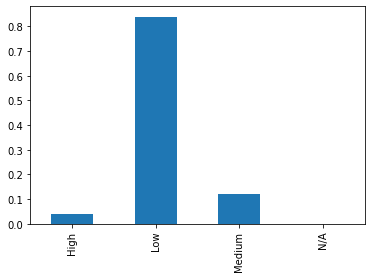

In [21]:
# Let's plot this a bit differently

relative_counts["Asian", 0].plot.bar()

In [22]:
from statsmodels.formula.api import Logit, logit, mnlogit

ImportError: cannot import name 'Logit' from 'statsmodels.formula.api' (/home/olethros/.local/lib/python3.8/site-packages/statsmodels/formula/api.py)

In [ ]:
df['scored_high'] = 0 + (df.score_text == 'High')

In [ ]:
model = logit('scored_high ~ race + is_violent_recid + agency_text', df)

In [ ]:
fitted_model = model.fit()

In [ ]:
fitted_model.summary2()

# Conditional independence

Here you should try and measure the conditional independence of your model $P$ with respect to the sensitive variable (race). In particular, we wish to calculate the dependence of the risk classification $a$ on race $z$ given their recidivism $y$:
$$D(P(a \mid y, z), P(a \mid y)),$$
which corresponds to the policy for selecting the scores being balanced. We also wish to calculate the dependence of recidivism $y$ on race $z$ given the risk $a$:
$$D(P(y \mid a, z), P(y \mid a)),$$
which corresponds to the policy for selecting the scores being calibrated.

Here $D$ is some appropriate distance or divergence between distributions. It is suggested to use one of:

1. Total variation https://en.wikipedia.org/wiki/Total_variation_distance_of_probability_measures 
2. KL divergence https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence or 
3. $1/2$-Renyi-divergence https://en.wikipedia.org/wiki/R%C3%A9nyi_entropy#R%C3%A9nyi_divergence

Does the policy look fair with respect to either one of those metrics?
